/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


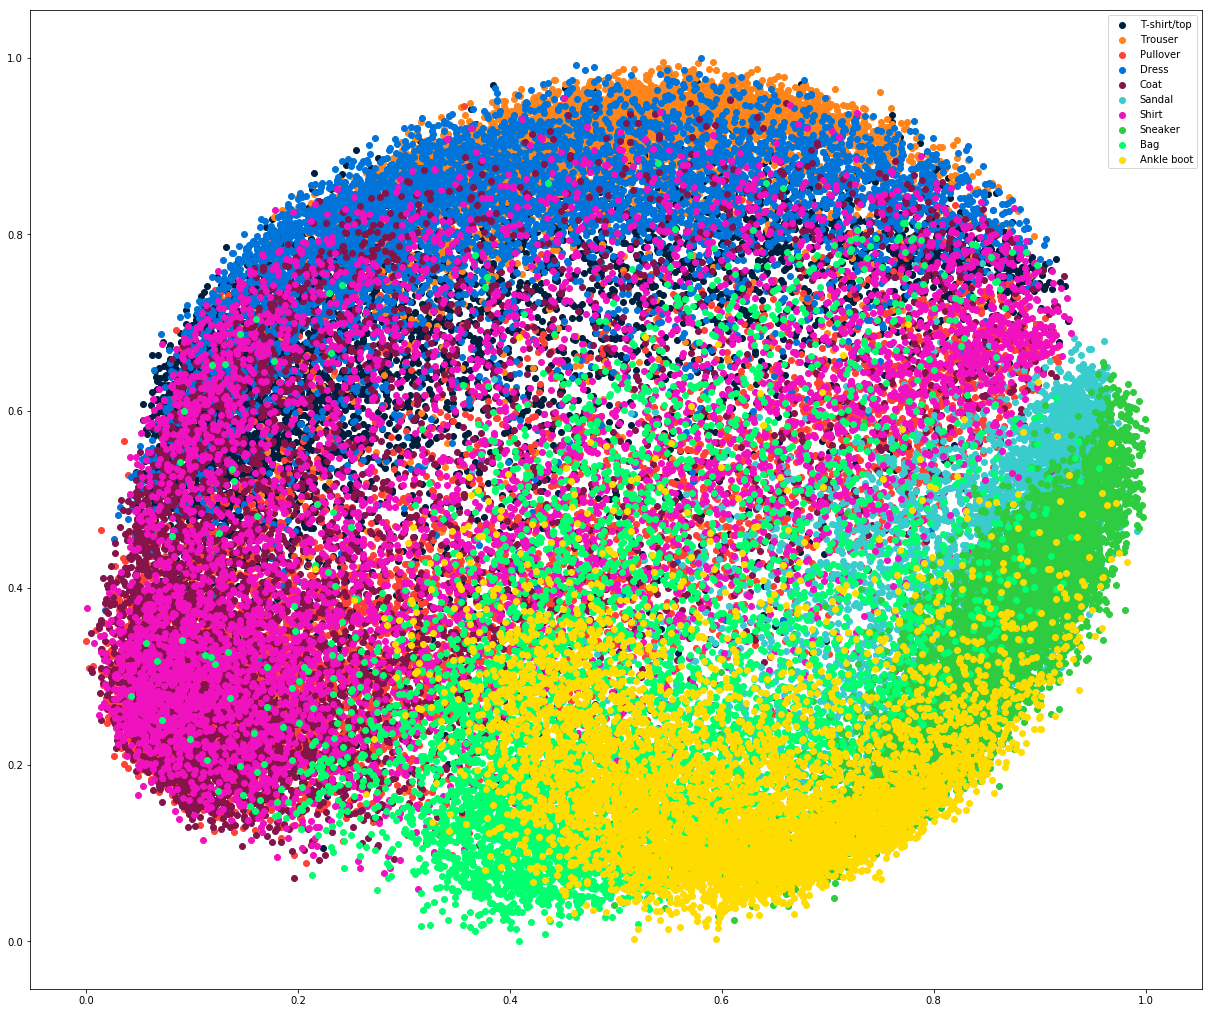

In [1]:
from sklearn.metrics import classification_report, confusion_matrix
from utils import mnist_reader
from timeit import default_timer as timer

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from ast import literal_eval

import scikitplot as skplt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools


X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

class_names = np.unique(y_test)

### visualizacion de datos de entrenamiento

# defined labels
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
         'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# defined colors, i love this one
colors = ['rgb(0,31,63)', 'rgb(255,133,27)', 'rgb(255,65,54)', 'rgb(0,116,217)', 'rgb(133,20,75)', 'rgb(57,204,204)',
'rgb(240,18,190)', 'rgb(46,204,64)', 'rgb(1,255,112)', 'rgb(255,220,0)',
'rgb(76,114,176)', 'rgb(85,168,104)', 'rgb(129,114,178)', 'rgb(100,181,205)']

    
df_copy_images_ = StandardScaler().fit_transform(X_train)
df_copy_images_ = Normalizer().fit_transform(df_copy_images_)
df_copy_images_component = PCA(n_components = 2).fit_transform(df_copy_images_)

# esclamos los valores ente 0 y 1
df_copy_images_component = MinMaxScaler().fit_transform(df_copy_images_component)

plt.rcParams["figure.figsize"] = [21, 18]

for k, i in enumerate(class_names):
    plt.scatter(df_copy_images_component[y_train == i, 0],
               df_copy_images_component[y_train == i, 1],
               color = '#%02x%02x%02x' % literal_eval(colors[k][3:]),label = labels[k])
plt.legend()
plt.show()
